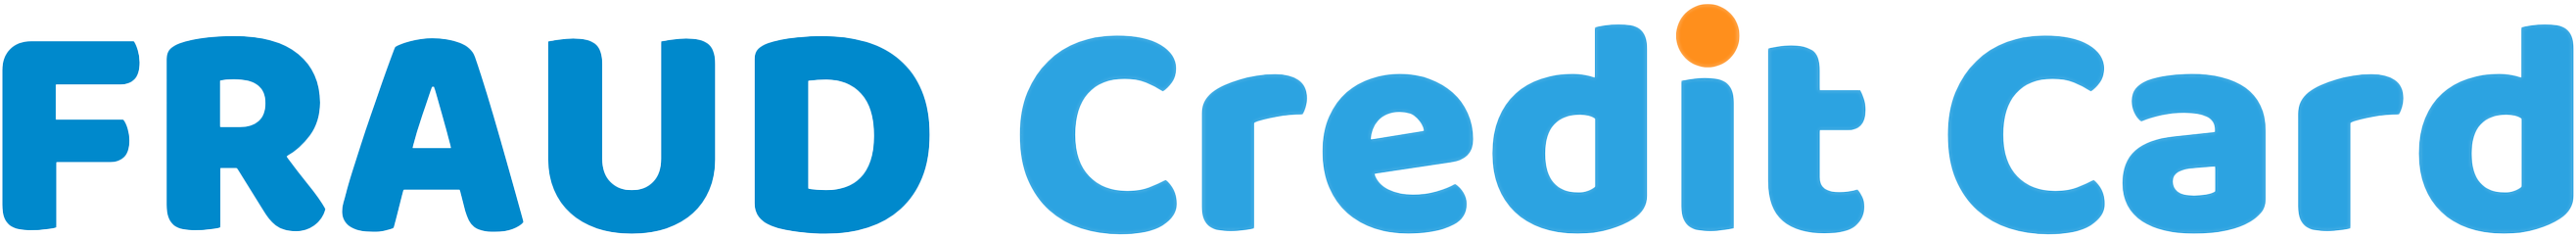

## About the Dataset
   Đây là một tập dữ liệu mô phỏng các giao dịch thẻ tín dụng, bao gồm cả các giao dịch hợp lệ và gian lận trong khoảng thời gian từ ngày 1 tháng 1 năm 2019 đến ngày 31 tháng 6 năm 2020. Tập dữ liệu này bao gồm thông tin về giao dịch của 1000 khách hàng sử dụng thẻ tín dụng với một nhóm 800 nhà cung cấp dịch vụ.
## Data Description

* trans_date_trans_time: Ngày và giờ của giao dịch.
* cc_num: Số thẻ tín dụng của khách hàng.
* merchant: Nhà cung cấp dịch vụ mà khách hàng đang thanh toán (ví dụ: Amazon, Walmart).
* category: Danh mục của giao dịch.
* amt: Số tiền của giao dịch.
* first: Tên đầu tiên của khách hàng.
* last: Họ của khách hàng.
* gender: Giới tính của khách hàng.
* street, city, state: Địa chỉ của khách hàng.
* zip: Mã zip của giao dịch.
* lat: Vĩ độ của khách hàng.
* long: Kinh độ của khách hàng.
* city_pop: Dân số của thành phố mà khách hàng đang sống.
* job: Nghề nghiệp của khách hàng.
* dob: Ngày sinh của khách hàng.
* trans_num: Số giao dịch duy nhất cho mỗi giao dịch.
* unix_time: Thời gian của giao dịch theo định dạng Unix (thường không được sử dụng trong phân tích do tính duy nhất).
* merch_lat: Vĩ độ của người bán.
* merch_long: Kinh độ của người bán.
* is_fraud: Chỉ số nhị phân cho biết liệu giao dịch có gian lận hay không (1 nếu gian lận, 0 nếu không gian lận).

# Import Libraries

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
from IPython.display import Image

# Import các modules và classes từ scikit-learn
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics
from sklearn.utils import shuffle

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## Import Data

In [2]:
# Đọc dữ liệu từ các file CSV
fraud_train = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
fraud_test = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

# Gán fraud_train cho df, sau đó loại bỏ cột đầu tiên của fraud_test và df
df = fraud_train
fraud_test.drop(fraud_test.columns[:1], axis=1, inplace=True)
df.drop(df.columns[:1], axis=1, inplace=True)

# Hiển thị các hàng đầu tiên của DataFrame df
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
# In ra số lượng bản ghi trong tập dữ liệu kiểm tra và tập dữ liệu chính
print('Number of records in the test dataset: ', fraud_test.shape)
print('Number of records in the dataset: ', df.shape)

Number of records in the test dataset:  (555719, 22)
Number of records in the dataset:  (1296675, 22)


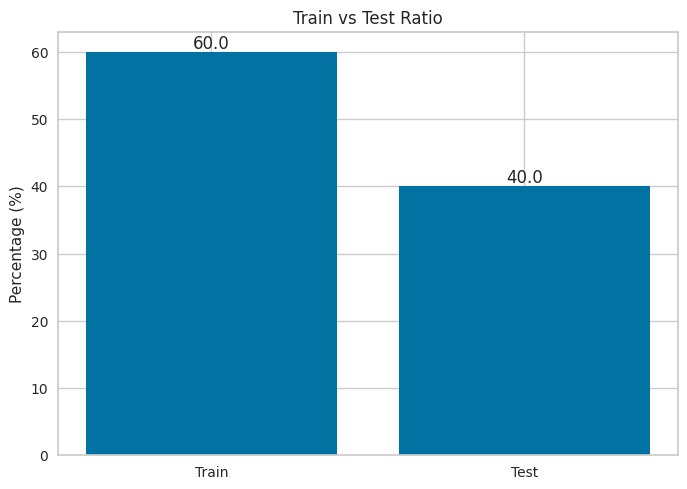

In [4]:
# Tính tỷ lệ phần trăm giữa tập huấn luyện và tập kiểm tra
train_percentage = 100 - 100 * round(len(fraud_test) / len(fraud_train), 1)
test_percentage = 100 * round(len(fraud_test) / len(fraud_train), 1)

# Vẽ biểu đồ cột hiển thị tỷ lệ tập huấn luyện và tập kiểm tra
plt.bar(['Train', 'Test'], [train_percentage, test_percentage])
plt.ylabel('Percentage (%)')
plt.title('Train vs Test Ratio')

# Hiển thị giá trị trên cột của biểu đồ
for i, v in enumerate([train_percentage, test_percentage]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [6]:
# Đếm giá trị duy nhất
df.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

Genuine: 1289169 and 99.42 % of the dataset
Frauds: 7506 and 0.58 % of the dataset


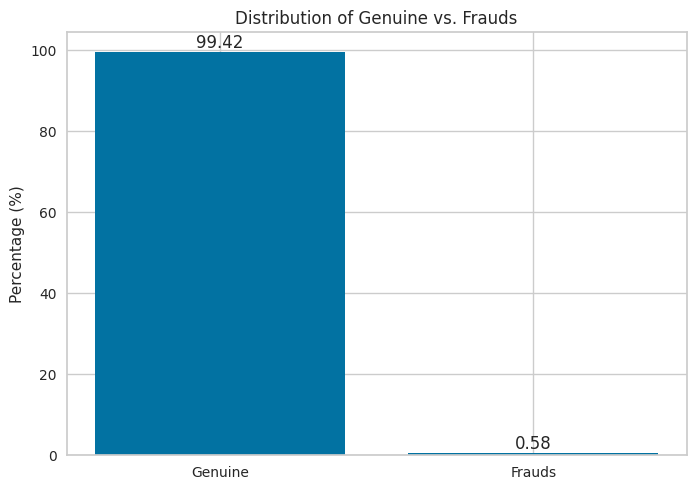

In [7]:
# Tính phần trăm số lượng giao dịch không gian lận và giao dịch gian lận trong tập dữ liệu
genuine_percentage = round((df['is_fraud'].value_counts()[0] / len(df)) * 100, 2)
fraud_percentage = round((df['is_fraud'].value_counts()[1] / len(df)) * 100, 2)

# In ra số lượng giao dịch không gian lận và giao dịch gian lận cùng với phần trăm tương ứng
print('Genuine:', df['is_fraud'].value_counts()[0], 'and', genuine_percentage, '% of the dataset')
print('Frauds:', df['is_fraud'].value_counts()[1], 'and', fraud_percentage, '% of the dataset')

# Vẽ biểu đồ cột để thể hiện phân phối giữa giao dịch không gian lận và giao dịch gian lận
plt.bar(['Genuine', 'Frauds'], [genuine_percentage, fraud_percentage])
plt.ylabel('Percentage (%)')
plt.title('Distribution of Genuine vs. Frauds')

# Hiển thị giá trị trên cột của biểu đồ
for i, v in enumerate([genuine_percentage, fraud_percentage]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Data pre-processing

In [8]:
# Tạo một bản sao của DataFrame để loại bỏ các dòng trùng lặp
df_dropdup = df.copy()

# Loại bỏ các dòng trùng lặp từ DataFrame
df_dropdup.drop_duplicates(inplace=True)

# In ra thông báo về việc loại bỏ các giá trị trùng lặp và số lượng giá trị bị loại bỏ
print("Number of duplicated values removed:", df.shape[0] - df_dropdup.shape[0])

# Gán DataFrame ban đầu bằng DataFrame không có dòng trùng lặp
df = df_dropdup

# Loại bỏ các dòng trùng lặp từ DataFrame 'fraud_test'
fraud_test.drop_duplicates(inplace=True)

Number of duplicated values removed: 0


In [9]:
# Chuyển đổi cột 'trans_date_trans_time' thành định dạng datetime trong DataFrame 'df'
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Chuyển đổi cột 'trans_date_trans_time' thành định dạng datetime trong DataFrame 'fraud_test'
fraud_test['trans_date_trans_time'] = pd.to_datetime(fraud_test['trans_date_trans_time'])

In [10]:
# Chuyển đổi cột 'dob' thành định dạng datetime trong DataFrame 'df'
df['dob'] = pd.to_datetime(df['dob'])

# Chuyển đổi cột 'dob' thành định dạng datetime trong DataFrame 'fraud_test'
fraud_test['dob'] = pd.to_datetime(fraud_test['dob'])

In [11]:
# Loại bỏ chuỗi 'fraud_' từ cột 'merchant' trong DataFrame 'df'
df['merchant'] = df['merchant'].str.strip('fraud_')

# Loại bỏ chuỗi 'fraud_' từ cột 'merchant' trong DataFrame 'fraud_test'
fraud_test['merchant'] = fraud_test['merchant'].str.strip('fraud_')

In [12]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


# Feature Extraction

In [13]:
# Tạo cột 'year_month' từ cột 'trans_date_trans_time' trong DataFrame 'df'
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')

# Tạo cột 'year_month' từ cột 'trans_date_trans_time' trong DataFrame 'fraud_test'
fraud_test['year_month'] = fraud_test['trans_date_trans_time'].dt.to_period('M')

# Hiển thị cột 'year_month' trong DataFrame 'df'
df['year_month']

0          2019-01
1          2019-01
2          2019-01
3          2019-01
4          2019-01
            ...   
1296670    2020-06
1296671    2020-06
1296672    2020-06
1296673    2020-06
1296674    2020-06
Name: year_month, Length: 1296675, dtype: period[M]

In [14]:
# Tạo cột 'day_of_week' từ cột 'trans_date_trans_time' trong DataFrame 'df'
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

# Tạo cột 'day_of_week' từ cột 'trans_date_trans_time' trong DataFrame 'fraud_test'
fraud_test['day_of_week'] = fraud_test['trans_date_trans_time'].dt.day_name()

# Hiển thị cột 'day_of_week' trong DataFrame 'df'
df['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1296670     Sunday
1296671     Sunday
1296672     Sunday
1296673     Sunday
1296674     Sunday
Name: day_of_week, Length: 1296675, dtype: object

In [15]:
df_mapping = df.copy()

In [16]:
# Tạo cột 'trans_hour' từ cột 'trans_date_trans_time' trong DataFrame 'df'
df['trans_hour'] = df['trans_date_trans_time'].dt.hour

# Tạo cột 'trans_hour' từ cột 'trans_date_trans_time' trong DataFrame 'fraud_test'
fraud_test['trans_hour'] = fraud_test['trans_date_trans_time'].dt.hour

# Hiển thị cột 'trans_hour' trong DataFrame 'df'
df['trans_hour']

0           0
1           0
2           0
3           0
4           0
           ..
1296670    12
1296671    12
1296672    12
1296673    12
1296674    12
Name: trans_hour, Length: 1296675, dtype: int32

In [17]:
# Chuyển cột 'dob' sang định dạng datetime và tính tuổi trong DataFrame 'df'
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = ((df['trans_date_trans_time'] - df['dob'])/ pd.Timedelta(days=365)).astype(int)

# Chuyển cột 'dob' sang định dạng datetime và tính tuổi trong DataFrame 'fraud_test'
fraud_test['dob'] = pd.to_datetime(fraud_test['dob'])
fraud_test['age'] = ((fraud_test['trans_date_trans_time'] - fraud_test['dob'])/ pd.Timedelta(days=365)).astype(int)

In [18]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year_month,day_of_week,trans_hour,age
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01,Tuesday,0,30
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01,Tuesday,0,40
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01,Tuesday,0,56
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01,Tuesday,0,52
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01,Tuesday,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,2020-06,Sunday,12,58
1296671,2020-06-21 12:12:19,6011149206456997,Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,2020-06,Sunday,12,40
1296672,2020-06-21 12:12:32,3514865930894695,Stiedemann Lt,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,2020-06,Sunday,12,52
1296673,2020-06-21 12:13:36,2720012583106919,"Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,2020-06,Sunday,12,39


In [19]:
from geopy.distance import geodesic
# Tính toán khoảng cách và lưu vào cột 'distance'
df['distance'] = df.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers, axis=1)

In [20]:
fraud_test['distance'] = fraud_test.apply(lambda row: geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).kilometers, axis=1)

In [21]:
#  Danh sách các cột sẽ được loại bỏ khỏi DataFrame

drop_cols = ['trans_date_trans_time','cc_num','unix_time','lat',
              'long','merch_lat','merch_long','dob','city','street','merchant',
             'zip','first','last','trans_num','job']

In [22]:
# Loại bỏ các cột trong danh sách 'drop_cols' từ DataFrame 'df'
df.drop(drop_cols, axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)  # Reset chỉ số của DataFrame

# Loại bỏ các cột trong danh sách 'drop_cols' từ DataFrame 'fraud_test'
fraud_test.drop(drop_cols, axis=1, inplace=True)
fraud_test.reset_index(drop=True, inplace=True)  # Reset chỉ số của DataFrame 'fraud_test'

In [23]:
df.head(3)

,category,amt,gender,state,city_pop,is_fraud,year_month,day_of_week,trans_hour,age,distance
0,misc_net,4.97,F,NC,3495,0,2019-01,Tuesday,0,30,78.773821
1,grocery_pos,107.23,F,WA,149,0,2019-01,Tuesday,0,40,30.216618
2,entertainment,220.11,M,ID,4154,0,2019-01,Tuesday,0,56,108.102912


In [24]:
fraud_test.head(3)

,category,amt,gender,state,city_pop,is_fraud,year_month,day_of_week,trans_hour,age,distance
0,personal_care,2.86,M,SC,333497,0,2020-06,Sunday,12,52,24.613746
1,personal_care,29.84,F,UT,302,0,2020-06,Sunday,12,30,104.834043
2,health_fitness,41.28,F,NY,34496,0,2020-06,Sunday,12,49,59.204796


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype    
---  ------       --------------    -----    
 0   category     1296675 non-null  object   
 1   amt          1296675 non-null  float64  
 2   gender       1296675 non-null  object   
 3   state        1296675 non-null  object   
 4   city_pop     1296675 non-null  int64    
 5   is_fraud     1296675 non-null  int64    
 6   year_month   1296675 non-null  period[M]
 7   day_of_week  1296675 non-null  object   
 8   trans_hour   1296675 non-null  int32    
 9   age          1296675 non-null  int64    
 10  distance     1296675 non-null  float64  
dtypes: float64(2), int32(1), int64(3), object(4), period[M](1)
memory usage: 103.9+ MB


# Exploratory Data Analysis

<Axes: >

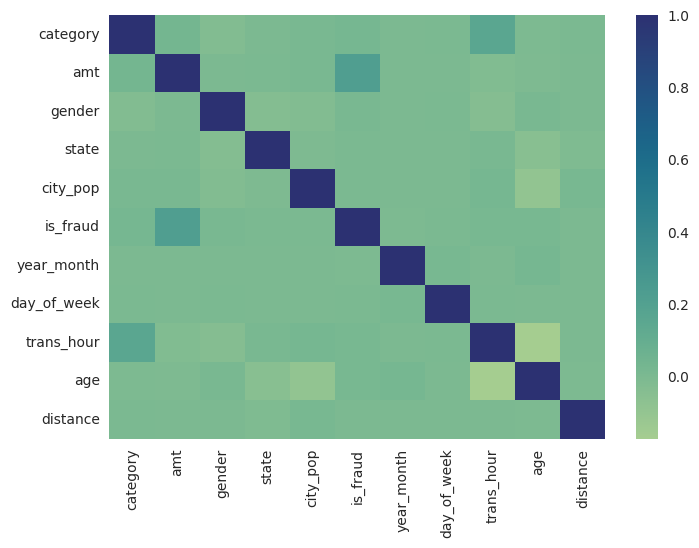

In [26]:
def apply_feature_engineering(df):
    """
    Áp dụng kỹ thuật feature engineering để chuyển đổi dữ liệu phân loại thành dạng số.

    Tham số:
    df (pandas DataFrame): DataFrame đầu vào chứa các cột phân loại

    Trả về:
    pandas DataFrame: DataFrame với các cột phân loại được chuyển đổi thành mã số
    """
    df["category"] = df["category"].astype("category").cat.codes
    df["gender"] = df["gender"].astype("category").cat.codes
    df["state"] = df["state"].astype("category").cat.codes
    df["year_month"] = df["year_month"].astype("category").cat.codes
    df["day_of_week"] = df["day_of_week"].astype("category").cat.codes
    
    return df

# Áp dụng kỹ thuật feature engineering vào DataFrame gốc và DataFrame kiểm tra
df2 = apply_feature_engineering(df.copy())
df_test = apply_feature_engineering(fraud_test.copy())

# Hiển thị độ tương quan sau khi chuẩn hóa dữ liệu bằng biểu đồ heatmap
sns.heatmap(df2.corr(), cmap='crest') # Hiển thị heatmap sau khi chuẩn hóa dữ liệu

In [27]:
df2.head()

,category,amt,gender,state,city_pop,is_fraud,year_month,day_of_week,trans_hour,age,distance
0,8,4.97,0,27,3495,0,0,5,0,30,78.773821
1,4,107.23,0,47,149,0,0,5,0,40,30.216618
2,0,220.11,1,13,4154,0,0,5,0,56,108.102912
3,2,45.00,1,26,1939,0,0,5,0,52,95.685115
4,9,41.96,1,45,99,0,0,5,0,32,77.702395


# Train test split

In [28]:
df2

,category,amt,gender,state,city_pop,is_fraud,year_month,day_of_week,trans_hour,age,distance
0,8,4.97,0,27,3495,0,0,5,0,30,78.773821
1,4,107.23,0,47,149,0,0,5,0,40,30.216618
2,0,220.11,1,13,4154,0,0,5,0,56,108.102912
3,2,45.00,1,26,1939,0,0,5,0,52,95.685115
4,9,41.96,1,45,99,0,0,5,0,32,77.702395
...,...,...,...,...,...,...,...,...,...,...,...
1296670,0,15.56,1,44,258,0,17,3,12,58,119.696415
1296671,1,51.70,1,20,100,0,17,3,12,40,75.202184
1296672,1,105.93,1,32,899,0,17,3,12,52,98.987927
1296673,1,74.90,1,41,1126,0,17,3,12,39,84.688356


In [29]:
df_test

,category,amt,gender,state,city_pop,is_fraud,year_month,day_of_week,trans_hour,age,distance
0,10,2.86,1,39,333497,0,0,3,12,52,24.613746
1,10,29.84,0,43,302,0,0,3,12,30,104.834043
2,5,41.28,0,33,34496,0,0,3,12,49,59.204796
3,9,60.05,1,8,54767,0,0,3,12,32,27.615117
4,13,3.19,1,21,1126,0,0,3,12,65,104.423175
...,...,...,...,...,...,...,...,...,...,...,...
555714,5,43.77,1,23,519,0,6,4,23,54,77.032467
555715,7,111.84,1,42,28739,0,6,4,23,21,100.023736
555716,7,86.88,0,46,3684,0,6,4,23,39,80.887812
555717,13,7.99,1,12,129,0,6,4,23,55,53.060882


In [30]:
X_train = df2.drop('is_fraud', axis=1)
X_test = df_test.drop('is_fraud', axis=1)
y_train = df2['is_fraud']
y_test = df_test['is_fraud']

# Oversample/undersample

In [31]:
scaler = StandardScaler()

# Thực hiện chuẩn hóa dữ liệu cho các cột số
numerical_cols = ['amt', 'city_pop', 'age', 'distance']
scaled_features = scaler.fit_transform(X_train[numerical_cols])

# Tạo DataFrame từ dữ liệu đã chuẩn hóa
X_train_scaled_features = pd.DataFrame(scaled_features, columns=numerical_cols)

# Nối DataFrame đã scale và DataFrame không được scale
X_train = pd.concat([X_train.drop(columns=numerical_cols), X_train_scaled_features], axis=1)


scaled_features = scaler.fit_transform(X_test[numerical_cols])

# Tạo DataFrame từ dữ liệu đã chuẩn hóa
X_test_scaled_features = pd.DataFrame(scaled_features, columns=numerical_cols)

# Nối DataFrame đã scale và DataFrame không được scale
X_test = pd.concat([X_test.drop(columns=numerical_cols), X_test_scaled_features], axis=1)

In [32]:
X_train

,category,gender,state,year_month,day_of_week,trans_hour,amt,city_pop,age,distance
0,8,0,27,0,5,0,-0.407826,-0.282589,-0.891968,0.091478
1,4,0,47,0,5,0,0.230039,-0.293670,-0.317551,-1.577574
2,0,1,13,0,5,0,0.934149,-0.280406,0.601517,1.099604
3,2,1,26,0,5,0,-0.158132,-0.287742,0.371750,0.672768
4,9,1,45,0,5,0,-0.177094,-0.293835,-0.777085,0.054650
...,...,...,...,...,...,...,...,...,...,...
1296670,0,1,44,17,3,12,-0.341769,-0.293309,0.716400,1.498106
1296671,1,1,20,17,3,12,-0.116339,-0.293832,-0.317551,-0.031290
1296672,1,1,32,17,3,12,0.221930,-0.291186,0.371750,0.786295
1296673,1,1,41,17,3,12,0.028375,-0.290434,-0.374992,0.294778


## Random Oversampling

In [33]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

In [34]:
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)

In [35]:
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Genuine: 1289169 / 50.0 % of the dataset
Frauds: 1289169 / 50.0 % of the dataset


In [36]:
X_over, y_over = shuffle(X_over, y_over, random_state=42)

## Random Undersampling Imbalanced Datasets

In [37]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)

In [38]:
# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train, y_train)

In [39]:
print('Genuine:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Frauds:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

Genuine: 7506 / 50.0 % of the dataset
Frauds: 7506 / 50.0 % of the dataset


In [40]:
X_under, y_under = shuffle(X_under, y_under, random_state=42)

## SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

In [42]:
# fit and apply the transform
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [43]:
print('Genuine:', y_smote.value_counts()[0], '/', round(y_smote.value_counts()[0]/len(y_smote) * 100,2), '% of the dataset')
print('Frauds:', y_smote.value_counts()[1], '/',round(y_smote.value_counts()[1]/len(y_smote) * 100,2), '% of the dataset')

Genuine: 1289169 / 50.0 % of the dataset
Frauds: 1289169 / 50.0 % of the dataset


In [44]:
X_smote, y_smote = shuffle(X_smote, y_smote, random_state=42)

# Randomforest

In [45]:
from sklearn.ensemble import RandomForestClassifier

model_RF_wb = RandomForestClassifier()
model_RF_wb.fit(X_train, y_train)

train_pred = model_RF_wb.predict(X_train)
test_pred = model_RF_wb.predict(X_test)

# In báo cáo phân loại
print("Classification report (train set):\n", classification_report(y_train, train_pred))
print("Classification report (test set):\n", classification_report(y_test, test_pred))

#evaluating the model
model_name = 'Random Forest - Without Balancing'
train_score = model_RF_wb.score(X_train,y_train)
test_score = model_RF_wb.score(X_test,y_test)

acc_score = accuracy_score(y_test, test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

Classification report (train set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00      7506

    accuracy                           1.00   1296675
   macro avg       1.00      1.00      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675

Classification report (test set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.94      0.75      0.84      2145

    accuracy                           1.00    555719
   macro avg       0.97      0.88      0.92    555719
weighted avg       1.00      1.00      1.00    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Random Forest - Without Balancing,0.999998,0.998874,0.998874,0.998811,0.942857,0.753846


In [46]:
model_RF_ov = RandomForestClassifier()
model_RF_ov.fit(X_over, y_over)

train_pred = model_RF_ov.predict(X_over)
test_pred = model_RF_ov.predict(X_test)

# In báo cáo phân loại
print("Classification report (train set):\n", classification_report(y_over, train_pred))
print("Classification report (test set):\n", classification_report(y_test, test_pred))

#evaluating the model
model_name = 'Random Forest - Random Over Sampling'
train_score = model_RF_ov.score(X_over,y_over)
test_score = model_RF_ov.score(X_test,y_test)

acc_score = accuracy_score(y_test, test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
# Đảm bảo rằng model_eval_dict là một DataFrame
model_eval_dict = pd.DataFrame([model_eval_dict])

# Chạy hàm concat để thêm model_eval_dict vào evaluate_df
evaluate_df = pd.concat([evaluate_df, model_eval_dict], ignore_index=True)

evaluate_df

Classification report (train set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338

Classification report (test set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.92      0.78      0.85      2145

    accuracy                           1.00    555719
   macro avg       0.96      0.89      0.92    555719
weighted avg       1.00      1.00      1.00    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Random Forest - Without Balancing,0.999998,0.998874,0.998874,0.998811,0.942857,0.753846
1,Random Forest - Random Over Sampling,1.000000,0.998902,0.998902,0.998856,0.924268,0.779487


In [47]:
# Đoạn code huấn luyện mô hình Decision Tree đã được triển khai ở trên

# Ma trận confusion - Decision Tree
conf_matrix = confusion_matrix(y_test, test_pred)
print("Confusion Matrix :\n", conf_matrix)

# Tính điểm AUC - Decision Tree
auc = roc_auc_score(y_test, model_RF_ov.predict_proba(X_test)[:, 1])
print("AUC :", auc)


Confusion Matrix :
 [[553437    137]
 [   473   1672]]
AUC : 0.9826830803045365


In [48]:
model_RF_ud = RandomForestClassifier()
model_RF_ud.fit(X_under, y_under)

train_pred = model_RF_ud.predict(X_under)
test_pred = model_RF_ud.predict(X_test)

# In báo cáo phân loại
print("Classification report (train set):\n", classification_report(y_under, train_pred))
print("Classification report (test set):\n", classification_report(y_test, test_pred))

#evaluating the model
model_name = 'Random Forest - Random Under Sampling'
train_score = model_RF_ud.score(X_under,y_under)
test_score = model_RF_ud.score(X_test,y_test)

acc_score = accuracy_score(y_test, test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
# Đảm bảo rằng model_eval_dict là một DataFrame
model_eval_dict = pd.DataFrame([model_eval_dict])

# Chạy hàm concat để thêm model_eval_dict vào evaluate_df
evaluate_df = pd.concat([evaluate_df, model_eval_dict], ignore_index=True)

evaluate_df

Classification report (train set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7506
           1       1.00      1.00      1.00      7506

    accuracy                           1.00     15012
   macro avg       1.00      1.00      1.00     15012
weighted avg       1.00      1.00      1.00     15012

Classification report (test set):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.13      0.96      0.22      2145

    accuracy                           0.97    555719
   macro avg       0.56      0.97      0.61    555719
weighted avg       1.00      0.97      0.98    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Random Forest - Without Balancing,0.999998,0.998874,0.998874,0.998811,0.942857,0.753846
1,Random Forest - Random Over Sampling,1.000000,0.998902,0.998902,0.998856,0.924268,0.779487
2,Random Forest - Random Under Sampling,1.000000,0.974212,0.974212,0.983942,0.126563,0.962704


In [49]:
model_RF_sm = RandomForestClassifier()
model_RF_sm.fit(X_smote, y_smote)

train_pred = model_RF_sm.predict(X_smote)
test_pred = model_RF_sm.predict(X_test)

# In báo cáo phân loại
print("Classification report (train set):\n", classification_report(y_smote, train_pred))
print("Classification report (test set):\n", classification_report(y_test, test_pred))

#evaluating the model
model_name = 'Random Forest - SMOTE'
train_score = model_RF_ud.score(X_smote,y_smote)
test_score = model_RF_ud.score(X_test,y_test)

acc_score = accuracy_score(y_test, test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
# Đảm bảo rằng model_eval_dict là một DataFrame
model_eval_dict = pd.DataFrame([model_eval_dict])

# Chạy hàm concat để thêm model_eval_dict vào evaluate_df
evaluate_df = pd.concat([evaluate_df, model_eval_dict], ignore_index=True)

evaluate_df

Classification report (train set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338

Classification report (test set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.47      0.86      0.61      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.93      0.80    555719
weighted avg       1.00      1.00      1.00    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Random Forest - Without Balancing,0.999998,0.998874,0.998874,0.998811,0.942857,0.753846
1,Random Forest - Random Over Sampling,1.000000,0.998902,0.998902,0.998856,0.924268,0.779487
2,Random Forest - Random Under Sampling,1.000000,0.974212,0.974212,0.983942,0.126563,0.962704
3,Random Forest - SMOTE,0.946626,0.974212,0.995750,0.996366,0.472258,0.861072


In [50]:
# Đoạn code huấn luyện mô hình Decision Tree đã được triển khai ở trên

# Ma trận confusion - Decision Tree
conf_matrix = confusion_matrix(y_test, test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Tính điểm AUC - Decision Tree
auc = roc_auc_score(y_test, model_RF_sm.predict_proba(X_test)[:, 1])
print("AUC:", auc)


Confusion Matrix:
 [[551510   2064]
 [   298   1847]]
AUC: 0.9834743971791593


Các kết quả hiển thị hiệu suất của mô hình sử dụng Random Forest với các phương pháp xử lý mất cân bằng dữ liệu khác nhau. 

1. **Random Forest - Without Balancing**: Mô hình được huấn luyện trên dữ liệu không cân bằng ban đầu, không thực hiện bất kỳ xử lý cân bằng nào. Có thể dễ dẫn đến việc mô hình tập trung quá nhiều vào lớp dữ liệu đa số (không phải là gian lận), dẫn đến Recall (khả năng phát hiện gian lận) thấp.

2. **Random Forest - Random Over Sampling**: Dữ liệu đã được tăng cường (Over Sampling), làm tăng tỷ lệ giao dịch gian lận so với dữ liệu ban đầu. Kết quả là mô hình có Recall cao hơn so với mô hình không cân bằng, nhưng có thể giảm Precision do việc dự đoán nhiều giao dịch không phải là gian lận là gian lận.

3. **Random Forest - Random Under Sampling**: Dữ liệu đã được giảm bớt (Under Sampling), tạo ra một tập dữ liệu ít phổ biến hơn. Mặc dù Recall cao hơn so với các mô hình khác, nhưng Precision giảm, dẫn đến việc phân loại sai giao dịch gian lận.

4. **Random Forest - SMOTE**: Dữ liệu đã được tạo tổng hợp (SMOTE), tạo ra dữ liệu mới dựa trên các điểm dữ liệu hiện có. Mặc dù có Recall cao, nhưng Precision thấp, có thể dẫn đến nhiều dữ liệu noise và dự đoán nhiều giao dịch không phải là gian lận là gian lận.

**Lựa chọn thuật toán tốt nhất:** Trong trường hợp này, Random Forest với Random Over Sampling có thể được xem xét là tốt nhất. Nó cung cấp một sự cân bằng hợp lý giữa Precision và Recall, có khả năng phát hiện được nhiều giao dịch gian lận mà không dẫn đến việc dự đoán quá nhiều giao dịch không phải là gian lận.

# XGBOOST

In [51]:
from xgboost import XGBClassifier

model_XGB_wb = XGBClassifier()
model_XGB_wb.fit(X_over, y_over)

train_pred = model_XGB_wb.predict(X_over)
test_pred = model_XGB_wb.predict(X_test)

# In báo cáo phân loại
print("Classification report (train set):\n", classification_report(y_over, train_pred))
print("Classification report (test set):\n", classification_report(y_test, test_pred))

# evaluating the model
model_name = 'XGBoost - Random Over Sampling'
train_score = model_XGB_wb.score(X_over, y_over)
test_score = model_XGB_wb.score(X_test, y_test)

acc_score = accuracy_score(y_test, test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)

# creating a dataframe to compare the performance of different models
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
# Đảm bảo rằng model_eval_dict là một DataFrame
model_eval_dict = pd.DataFrame([model_eval_dict])

# Chạy hàm concat để thêm model_eval_dict vào evaluate_df
evaluate_df = pd.concat([evaluate_df, model_eval_dict], ignore_index=True)

evaluate_df

Classification report (train set):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1289169
           1       0.99      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338

Classification report (test set):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.39      0.94      0.55      2145

    accuracy                           0.99    555719
   macro avg       0.70      0.97      0.78    555719
weighted avg       1.00      0.99      1.00    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Random Forest - Without Balancing,0.999998,0.998874,0.998874,0.998811,0.942857,0.753846
1,Random Forest - Random Over Sampling,1.000000,0.998902,0.998902,0.998856,0.924268,0.779487
2,Random Forest - Random Under Sampling,1.000000,0.974212,0.974212,0.983942,0.126563,0.962704
3,Random Forest - SMOTE,0.946626,0.974212,0.995750,0.996366,0.472258,0.861072
4,XGBoost - Random Over Sampling,0.997287,0.994199,0.994199,0.995372,0.394070,0.935664


In [52]:
from xgboost import XGBClassifier

model_XGB_sm = XGBClassifier()
model_XGB_sm.fit(X_smote, y_smote)

train_pred = model_XGB_sm.predict(X_smote)
test_pred = model_XGB_sm.predict(X_test)

# In báo cáo phân loại
print("Classification report (train set):\n", classification_report(y_smote, train_pred))
print("Classification report (test set):\n", classification_report(y_test, test_pred))

# evaluating the model
model_name = 'XGBoost - SMOTE'
train_score = model_XGB_sm.score(X_smote, y_smote)
test_score = model_XGB_sm.score(X_test, y_test)

acc_score = accuracy_score(y_test, test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)

# creating a dataframe to compare the performance of different models
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
# Đảm bảo rằng model_eval_dict là một DataFrame
model_eval_dict = pd.DataFrame([model_eval_dict])

# Chạy hàm concat để thêm model_eval_dict vào evaluate_df
evaluate_df = pd.concat([evaluate_df, model_eval_dict], ignore_index=True)

evaluate_df

Classification report (train set):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99   1289169
           1       0.99      0.99      0.99   1289169

    accuracy                           0.99   2578338
   macro avg       0.99      0.99      0.99   2578338
weighted avg       0.99      0.99      0.99   2578338

Classification report (test set):
               precision    recall  f1-score   support

           0       1.00      0.95      0.98    553574
           1       0.07      0.94      0.13      2145

    accuracy                           0.95    555719
   macro avg       0.54      0.95      0.55    555719
weighted avg       1.00      0.95      0.97    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Random Forest - Without Balancing,0.999998,0.998874,0.998874,0.998811,0.942857,0.753846
1,Random Forest - Random Over Sampling,1.000000,0.998902,0.998902,0.998856,0.924268,0.779487
2,Random Forest - Random Under Sampling,1.000000,0.974212,0.974212,0.983942,0.126563,0.962704
3,Random Forest - SMOTE,0.946626,0.974212,0.995750,0.996366,0.472258,0.861072
4,XGBoost - Random Over Sampling,0.997287,0.994199,0.994199,0.995372,0.394070,0.935664
5,XGBoost - SMOTE,0.988082,0.952071,0.952071,0.972100,0.070983,0.944522


# MLP 

In [53]:
from sklearn.neural_network import MLPClassifier


model_MLP = MLPClassifier()
model_MLP.fit(X_over, y_over)

train_pred = model_MLP.predict(X_over)
test_pred = model_MLP.predict(X_test)

# In báo cáo phân loại
print("Classification report (train set):\n", classification_report(y_over, train_pred))
print("Classification report (test set):\n", classification_report(y_test, test_pred))

# evaluating the model
model_name = 'MLPClassifier - Random Over Sampling'
train_score = model_MLP.score(X_over, y_over)
test_score = model_MLP.score(X_test, y_test)

acc_score = accuracy_score(y_test, test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)

# creating a dataframe to compare the performance of different models
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
# Đảm bảo rằng model_eval_dict là một DataFrame
model_eval_dict = pd.DataFrame([model_eval_dict])

# Chạy hàm concat để thêm model_eval_dict vào evaluate_df
evaluate_df = pd.concat([evaluate_df, model_eval_dict], ignore_index=True)

evaluate_df

Classification report (train set):
               precision    recall  f1-score   support

           0       0.98      0.97      0.98   1289169
           1       0.98      0.98      0.98   1289169

    accuracy                           0.98   2578338
   macro avg       0.98      0.98      0.98   2578338
weighted avg       0.98      0.98      0.98   2578338

Classification report (test set):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.11      0.94      0.20      2145

    accuracy                           0.97    555719
   macro avg       0.56      0.95      0.60    555719
weighted avg       1.00      0.97      0.98    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Random Forest - Without Balancing,0.999998,0.998874,0.998874,0.998811,0.942857,0.753846
1,Random Forest - Random Over Sampling,1.000000,0.998902,0.998902,0.998856,0.924268,0.779487
2,Random Forest - Random Under Sampling,1.000000,0.974212,0.974212,0.983942,0.126563,0.962704
3,Random Forest - SMOTE,0.946626,0.974212,0.995750,0.996366,0.472258,0.861072
4,XGBoost - Random Over Sampling,0.997287,0.994199,0.994199,0.995372,0.394070,0.935664
5,XGBoost - SMOTE,0.988082,0.952071,0.952071,0.972100,0.070983,0.944522
6,MLPClassifier - Random Over Sampling,0.978773,0.971887,0.971887,0.982675,0.114738,0.935664


In [54]:
from sklearn.neural_network import MLPClassifier


model_MLP = MLPClassifier()
model_MLP.fit(X_smote, y_smote)

train_pred = model_MLP.predict(X_smote)
test_pred = model_MLP.predict(X_test)

# In báo cáo phân loại
print("Classification report (train set):\n", classification_report(y_smote, train_pred))
print("Classification report (test set):\n", classification_report(y_test, test_pred))

# evaluating the model
model_name = 'MLPClassifier - SMOTE'
train_score = model_MLP.score(X_smote, y_smote)
test_score = model_MLP.score(X_test, y_test)

acc_score = accuracy_score(y_test, test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)

# creating a dataframe to compare the performance of different models
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
# Đảm bảo rằng model_eval_dict là một DataFrame
model_eval_dict = pd.DataFrame([model_eval_dict])

# Chạy hàm concat để thêm model_eval_dict vào evaluate_df
evaluate_df = pd.concat([evaluate_df, model_eval_dict], ignore_index=True)

evaluate_df


Classification report (train set):
               precision    recall  f1-score   support

           0       0.96      0.97      0.97   1289169
           1       0.97      0.96      0.97   1289169

    accuracy                           0.97   2578338
   macro avg       0.97      0.97      0.97   2578338
weighted avg       0.97      0.97      0.97   2578338

Classification report (test set):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.10      0.92      0.18      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.94      0.58    555719
weighted avg       1.00      0.97      0.98    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Random Forest - Without Balancing,0.999998,0.998874,0.998874,0.998811,0.942857,0.753846
1,Random Forest - Random Over Sampling,1.000000,0.998902,0.998902,0.998856,0.924268,0.779487
2,Random Forest - Random Under Sampling,1.000000,0.974212,0.974212,0.983942,0.126563,0.962704
3,Random Forest - SMOTE,0.946626,0.974212,0.995750,0.996366,0.472258,0.861072
4,XGBoost - Random Over Sampling,0.997287,0.994199,0.994199,0.995372,0.394070,0.935664
5,XGBoost - SMOTE,0.988082,0.952071,0.952071,0.972100,0.070983,0.944522
6,MLPClassifier - Random Over Sampling,0.978773,0.971887,0.971887,0.982675,0.114738,0.935664
7,MLPClassifier - SMOTE,0.965452,0.966953,0.966953,0.980026,0.097838,0.919814


In [55]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(X_smote, y_smote)

train_pred = model_LR.predict(X_smote)
test_pred = model_LR.predict(X_test)

# In báo cáo phân loại
print("Classification report (train set) - Logistic Regression:\n", classification_report(y_smote, train_pred))
print("Classification report (test set) - Logistic Regression:\n", classification_report(y_test, test_pred))

# evaluating the model
model_name = 'Logistic Regression - SMOTE'
train_score = model_LR.score(X_smote, y_smote)
test_score = model_LR.score(X_test, y_test)

acc_score = accuracy_score(y_test, test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)

# creating a dataframe to compare the performance of different models
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}
# Đảm bảo rằng model_eval_dict là một DataFrame
model_eval_dict = pd.DataFrame([model_eval_dict])

# Chạy hàm concat để thêm model_eval_dict vào evaluate_df
evaluate_df = pd.concat([evaluate_df, model_eval_dict], ignore_index=True)

evaluate_df

Classification report (train set) - Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86   1289169
           1       0.92      0.78      0.84   1289169

    accuracy                           0.85   2578338
   macro avg       0.86      0.85      0.85   2578338
weighted avg       0.86      0.85      0.85   2578338

Classification report (test set) - Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95    553574
           1       0.03      0.77      0.06      2145

    accuracy                           0.91    555719
   macro avg       0.52      0.84      0.51    555719
weighted avg       1.00      0.91      0.95    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Random Forest - Without Balancing,0.999998,0.998874,0.998874,0.998811,0.942857,0.753846
1,Random Forest - Random Over Sampling,1.000000,0.998902,0.998902,0.998856,0.924268,0.779487
2,Random Forest - Random Under Sampling,1.000000,0.974212,0.974212,0.983942,0.126563,0.962704
3,Random Forest - SMOTE,0.946626,0.974212,0.995750,0.996366,0.472258,0.861072
4,XGBoost - Random Over Sampling,0.997287,0.994199,0.994199,0.995372,0.394070,0.935664
5,XGBoost - SMOTE,0.988082,0.952071,0.952071,0.972100,0.070983,0.944522
6,MLPClassifier - Random Over Sampling,0.978773,0.971887,0.971887,0.982675,0.114738,0.935664
7,MLPClassifier - SMOTE,0.965452,0.966953,0.966953,0.980026,0.097838,0.919814
8,Logistic Regression - SMOTE,0.853682,0.906339,0.906339,0.947276,0.031066,0.770629


In [56]:
model_LR = LogisticRegression()
model_LR.fit(X_over, y_over)

train_pred = model_LR.predict(X_over)
test_pred = model_LR.predict(X_test)

# In báo cáo phân loại
print("Classification report (train set) - Logistic Regression:\n", classification_report(y_over, train_pred))
print("Classification report (test set) - Logistic Regression:\n", classification_report(y_test, test_pred))

# evaluating the model
model_name = 'Logistic Regression - Random Over Sampling'
train_score = model_LR.score(X_over, y_over)
test_score = model_LR.score(X_test, y_test)

acc_score = accuracy_score(y_test, test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)

# creating a dataframe to compare the performance of different models
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}
# Đảm bảo rằng model_eval_dict là một DataFrame
model_eval_dict = pd.DataFrame([model_eval_dict])

# Chạy hàm concat để thêm model_eval_dict vào evaluate_df
evaluate_df = pd.concat([evaluate_df, model_eval_dict], ignore_index=True)

evaluate_df

Classification report (train set) - Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87   1289169
           1       0.94      0.76      0.84   1289169

    accuracy                           0.85   2578338
   macro avg       0.87      0.85      0.85   2578338
weighted avg       0.87      0.85      0.85   2578338

Classification report (test set) - Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.04      0.76      0.08      2145

    accuracy                           0.94    555719
   macro avg       0.52      0.85      0.53    555719
weighted avg       1.00      0.94      0.96    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Random Forest - Without Balancing,0.999998,0.998874,0.998874,0.998811,0.942857,0.753846
1,Random Forest - Random Over Sampling,1.000000,0.998902,0.998902,0.998856,0.924268,0.779487
2,Random Forest - Random Under Sampling,1.000000,0.974212,0.974212,0.983942,0.126563,0.962704
3,Random Forest - SMOTE,0.946626,0.974212,0.995750,0.996366,0.472258,0.861072
4,XGBoost - Random Over Sampling,0.997287,0.994199,0.994199,0.995372,0.394070,0.935664
5,XGBoost - SMOTE,0.988082,0.952071,0.952071,0.972100,0.070983,0.944522
6,MLPClassifier - Random Over Sampling,0.978773,0.971887,0.971887,0.982675,0.114738,0.935664
7,MLPClassifier - SMOTE,0.965452,0.966953,0.966953,0.980026,0.097838,0.919814
8,Logistic Regression - SMOTE,0.853682,0.906339,0.906339,0.947276,0.031066,0.770629
9,Logistic Regression - Random Over Sampling,0.853325,0.936842,0.936842,0.963885,0.044760,0.755245


In [57]:
# Ma trận confusion - Logistic Regression
conf_matrix = confusion_matrix(y_test, test_pred)
print("Confusion Matrix - Logistic Regression:\n", conf_matrix)

# Tính điểm AUC - Logistic Regression
auc = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
print("AUC - Logistic Regression:", auc)

Confusion Matrix - Logistic Regression:
 [[519001  34573]
 [   525   1620]]
AUC - Logistic Regression: 0.8485599586254603


In [58]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(X_smote, y_smote)

train_pred = model_DT.predict(X_smote)
test_pred = model_DT.predict(X_test)

# In báo cáo phân loại
print("Classification report (train set) - Decision Tree:\n", classification_report(y_smote, train_pred))
print("Classification report (test set) - Decision Tree:\n", classification_report(y_test, test_pred))

# evaluating the model
model_name = 'Decision Tree - SMOTE'
train_score = model_DT.score(X_smote, y_smote)
test_score = model_DT.score(X_test, y_test)

acc_score = accuracy_score(y_test, test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)

# creating a dataframe to compare the performance of different models
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}
# Đảm bảo rằng model_eval_dict là một DataFrame
model_eval_dict = pd.DataFrame([model_eval_dict])

# Chạy hàm concat để thêm model_eval_dict vào evaluate_df
evaluate_df = pd.concat([evaluate_df, model_eval_dict], ignore_index=True)

evaluate_df

Classification report (train set) - Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338

Classification report (test set) - Decision Tree:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.11      0.87      0.19      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.92      0.59    555719
weighted avg       1.00      0.97      0.98    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Random Forest - Without Balancing,0.999998,0.998874,0.998874,0.998811,0.942857,0.753846
1,Random Forest - Random Over Sampling,1.000000,0.998902,0.998902,0.998856,0.924268,0.779487
2,Random Forest - Random Under Sampling,1.000000,0.974212,0.974212,0.983942,0.126563,0.962704
3,Random Forest - SMOTE,0.946626,0.974212,0.995750,0.996366,0.472258,0.861072
4,XGBoost - Random Over Sampling,0.997287,0.994199,0.994199,0.995372,0.394070,0.935664
5,XGBoost - SMOTE,0.988082,0.952071,0.952071,0.972100,0.070983,0.944522
6,MLPClassifier - Random Over Sampling,0.978773,0.971887,0.971887,0.982675,0.114738,0.935664
7,MLPClassifier - SMOTE,0.965452,0.966953,0.966953,0.980026,0.097838,0.919814
8,Logistic Regression - SMOTE,0.853682,0.906339,0.906339,0.947276,0.031066,0.770629
9,Logistic Regression - Random Over Sampling,0.853325,0.936842,0.936842,0.963885,0.044760,0.755245


In [59]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_over, y_over)

train_pred = model_DT.predict(X_over)
test_pred = model_DT.predict(X_test)

# In báo cáo phân loại
print("Classification report (train set) - Decision Tree:\n", classification_report(y_over, train_pred))
print("Classification report (test set) - Decision Tree:\n", classification_report(y_test, test_pred))

# evaluating the model
model_name = 'Decision Tree - Random Over Sampling'
train_score = model_DT.score(X_over, y_over)
test_score = model_DT.score(X_test, y_test)

acc_score = accuracy_score(y_test, test_pred)
f_score = f1_score(y_test, test_pred, average='weighted')
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)

# creating a dataframe to compare the performance of different models
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]: model_eval_data[i] for i in range(len(model_eval_data))}
# Đảm bảo rằng model_eval_dict là một DataFrame
model_eval_dict = pd.DataFrame([model_eval_dict])

# Chạy hàm concat để thêm model_eval_dict vào evaluate_df
evaluate_df = pd.concat([evaluate_df, model_eval_dict], ignore_index=True)

evaluate_df

Classification report (train set) - Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338

Classification report (test set) - Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.75      0.79      0.77      2145

    accuracy                           1.00    555719
   macro avg       0.88      0.89      0.89    555719
weighted avg       1.00      1.00      1.00    555719



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Random Forest - Without Balancing,0.999998,0.998874,0.998874,0.998811,0.942857,0.753846
1,Random Forest - Random Over Sampling,1.000000,0.998902,0.998902,0.998856,0.924268,0.779487
2,Random Forest - Random Under Sampling,1.000000,0.974212,0.974212,0.983942,0.126563,0.962704
3,Random Forest - SMOTE,0.946626,0.974212,0.995750,0.996366,0.472258,0.861072
4,XGBoost - Random Over Sampling,0.997287,0.994199,0.994199,0.995372,0.394070,0.935664
5,XGBoost - SMOTE,0.988082,0.952071,0.952071,0.972100,0.070983,0.944522
6,MLPClassifier - Random Over Sampling,0.978773,0.971887,0.971887,0.982675,0.114738,0.935664
7,MLPClassifier - SMOTE,0.965452,0.966953,0.966953,0.980026,0.097838,0.919814
8,Logistic Regression - SMOTE,0.853682,0.906339,0.906339,0.947276,0.031066,0.770629
9,Logistic Regression - Random Over Sampling,0.853325,0.936842,0.936842,0.963885,0.044760,0.755245


In [60]:
# Đoạn code huấn luyện mô hình Decision Tree đã được triển khai ở trên

# Ma trận confusion - Decision Tree
conf_matrix = confusion_matrix(y_test, test_pred)
print("Confusion Matrix - Decision Tree:\n", conf_matrix)

# Tính điểm AUC - Decision Tree
auc_DT = roc_auc_score(y_test, model_DT.predict_proba(X_test)[:, 1])
print("AUC - Decision Tree:", auc_DT)


Confusion Matrix - Decision Tree:
 [[553021    553]
 [   450   1695]]
AUC - Decision Tree: 0.8946054135540997
